In [1]:
# Make simulated data 
x <- 1:20
y <- 1:20

df <- data.frame(x=rep(1:20, 20), y=rep(1:20, each=20))

df$v1 <- 0.04*df$x + rnorm(400, 0, 0.2)
df$v2 <- 0.07*df$x + 0.2*df$y - 0.05*df$x * df$y + rnorm(400, 0, 0.2)
df$v3 <- df$v1 * rnorm(400, 1, 0.2)
df$v4 <- df$v2 * rnorm(400, 1, 0.6)
df$v5 <- 3*sin(df$x) + log(df$y) + rnorm(400, 0, 0.5)
df$v6 <- (abs(df$x - df$y))^2 + rnorm(400, 0, 5)

In [2]:
head(df)

x,y,v1,v2,v3,v4,v5,v6
1,1,-0.04927486,-0.002311177,-0.04871189,-0.003053631,2.0781477,-2.2488616
2,1,0.11921725,0.557085685,0.12204361,0.587118335,2.4424617,-3.0602674
3,1,0.28902719,0.191680532,0.22833518,0.405257410,-0.2918055,0.7738489
4,1,0.17188091,0.391388942,0.13151065,0.136867352,-1.3006660,7.7333459
5,1,0.03354268,0.296811282,0.05084657,0.167388147,-2.6100352,17.6613940
6,1,0.07619116,0.021651047,0.07462069,0.027811134,-0.8088710,23.2879839


In [3]:
df2matrix <- function(df, var) {
  m <- matrix(nrow=20, ncol=20)
  for (i in 1:nrow(df)) {
    x <- df[i, 'x']
    y <- df[i, 'y']
    val <- df[i, var]
    m[x, y] <- val
  }
  m
}

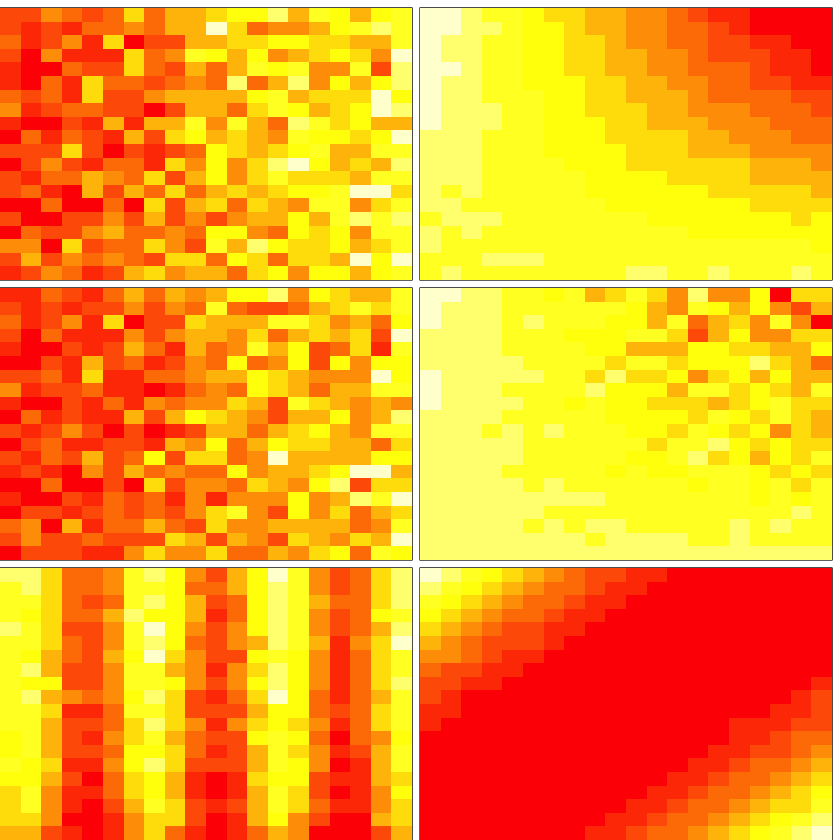

In [4]:
par(mfrow=c(3, 2))
par(mar=c(0, 0, 0.5, 0.5))
for (i in 1:6) {
  image(df2matrix(df, paste('v', i, sep='')), xaxt='n', yaxt='n')    
}

In [5]:
for (i in 1:6) {
  cat(sprintf('%d: [%.2f, %.2f]\n', 
              i, 
              quantile(df[, paste('v', i, sep='')], prob=0.1), 
              quantile(df[, paste('v', i, sep='')], prob=0.8)))
}

1: [0.03, 0.69]
2: [-8.24, 0.30]
3: [0.03, 0.67]
4: [-8.72, 0.21]
5: [-0.84, 4.68]
6: [1.41, 121.59]


In [6]:
# Add tree and beetle values
df$tree <- ifelse(
  df$v5 > -1.52 & df$v5 < 5.68 & df$v2 > -10.11 & df$v2 < 1.36, 1, 0)
df$beetle <- ifelse((df$tree == 1 
                     & df$v1 > 0.02 & df$v1 < 0.66 
                     & df$v4 > -8.75 & df$v4 < 0.27),
                    1,
                    0)

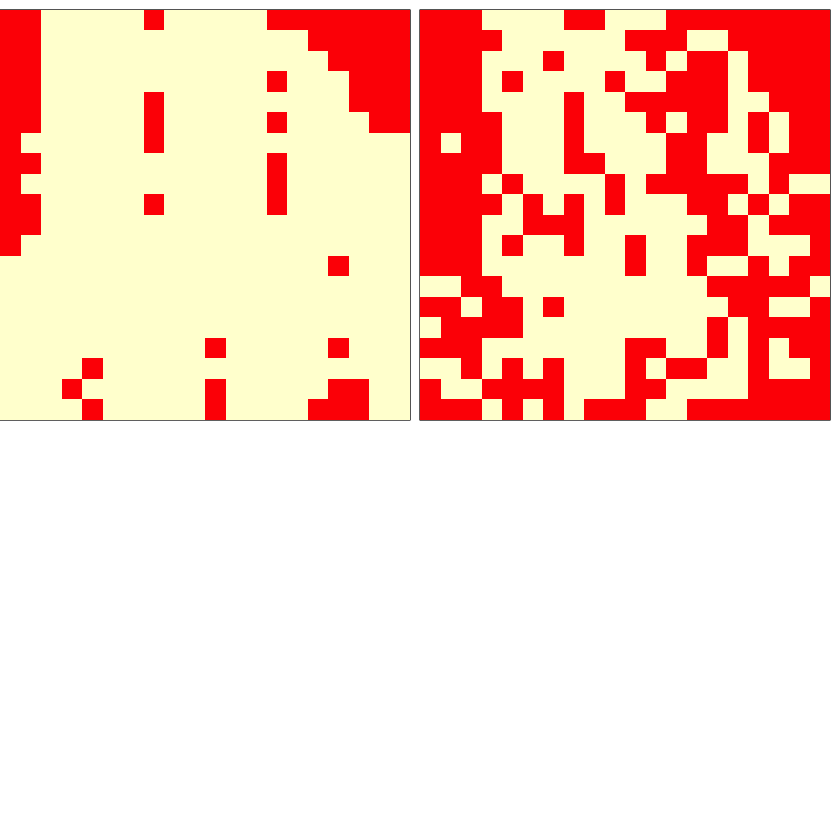

In [7]:
par(mfrow=c(2, 2))
par(mar=c(0, 0, 0.5, 0.5))
image(df2matrix(df, 'tree'), xaxt='n', yaxt='n')
image(df2matrix(df, 'beetle'), xaxt='n', yaxt='n')

In [8]:
head(df)

x,y,v1,v2,v3,v4,v5,v6,tree,beetle
1,1,-0.04927486,-0.002311177,-0.04871189,-0.003053631,2.0781477,-2.2488616,1,0
2,1,0.11921725,0.557085685,0.12204361,0.587118335,2.4424617,-3.0602674,1,0
3,1,0.28902719,0.191680532,0.22833518,0.405257410,-0.2918055,0.7738489,1,0
4,1,0.17188091,0.391388942,0.13151065,0.136867352,-1.3006660,7.7333459,1,1
5,1,0.03354268,0.296811282,0.05084657,0.167388147,-2.6100352,17.6613940,0,0
6,1,0.07619116,0.021651047,0.07462069,0.027811134,-0.8088710,23.2879839,1,1


In [9]:
vars <- 3:7
pca <- princomp(df[, vars], cor=T)

In [10]:
summary(pca, loadings <- T)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4    Comp.5
Standard deviation     1.6924221 1.0405598 0.9033762 0.42416511 0.2386168
Proportion of Variance 0.5728585 0.2165530 0.1632177 0.03598321 0.0113876
Cumulative Proportion  0.5728585 0.7894115 0.9526292 0.98861240 1.0000000

Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
v1  0.517  0.285  0.381         0.712
v2 -0.500  0.268  0.363  0.737       
v3  0.515  0.267  0.405  0.104 -0.699
v4 -0.466  0.288  0.503 -0.667       
v5        -0.832  0.552              

In [11]:
str(pca)

List of 7
 $ sdev    : Named num [1:5] 1.692 1.041 0.903 0.424 0.239
  ..- attr(*, "names")= chr [1:5] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ loadings: 'loadings' num [1:5, 1:5] 0.5166 -0.5002 0.5147 -0.4665 0.0197 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "v1" "v2" "v3" "v4" ...
  .. ..$ : chr [1:5] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ center  : Named num [1:5] 0.412 -2.669 0.41 -2.711 2.256
  ..- attr(*, "names")= chr [1:5] "v1" "v2" "v3" "v4" ...
 $ scale   : Named num [1:5] 0.298 3.616 0.315 4.335 2.303
  ..- attr(*, "names")= chr [1:5] "v1" "v2" "v3" "v4" ...
 $ n.obs   : int 400
 $ scores  : num [1:400, 1:5] -2.21 -1.78 -1.26 -1.63 -2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ call    : language princomp(x = df[, vars], cor = T)
 - attr(*, "class")= chr "princomp"


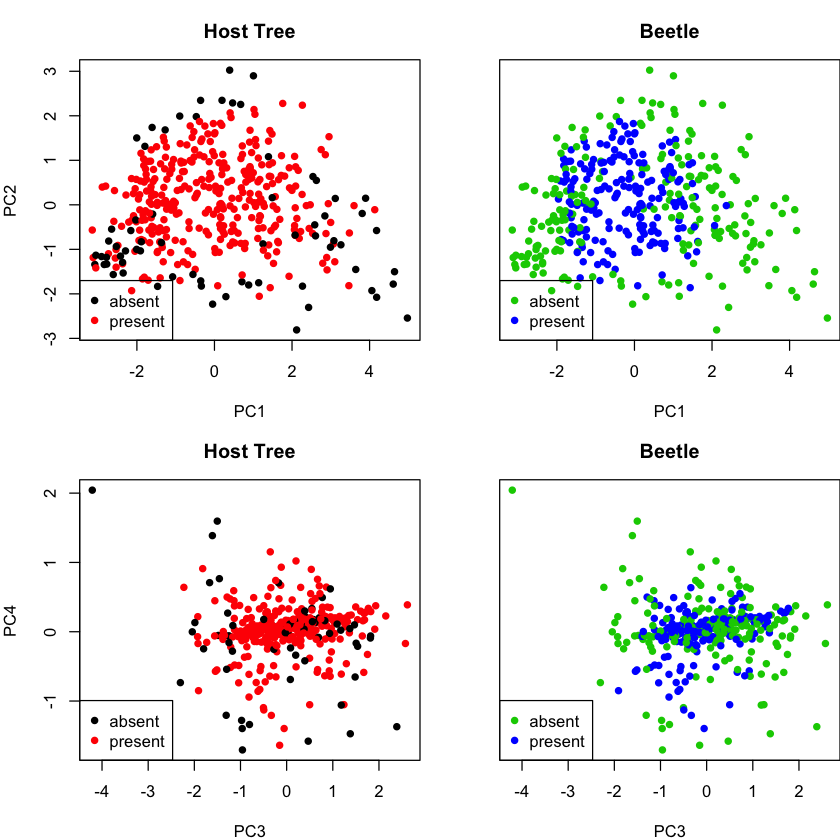

In [12]:
par(mfrow=c(2, 2))
par(mar=c(4, 4, 3, 0))
for(i in c(1, 3)) {
  plot(pca$scores[, i], 
       pca$scores[, i + 1], 
       col=(df$tree + 1), 
       pch=16,
       xlab=paste('PC', i, sep=''),
       ylab=paste('PC', i + 1, sep=''), 
       main='Host Tree')
  legend('bottomleft', pch=16, col=1:2, legend=c('absent', 'present'))
  plot(pca$scores[, i], 
       pca$scores[, i + 1], 
       col=(df$beetle + 3), 
       pch=16,
       xlab=paste('PC', i, sep=''),
       ylab='', 
       yaxt='n',
       main='Beetle')
  legend('bottomleft', pch=16, col=3:4, legend=c('absent', 'present'))

}
